In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##**dataset 1**

In [ ]:
dataset1 = pd.read_csv("/content/drive/MyDrive/grad/software_requirements_extended.csv")
dataset1


,Type,Requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...
...,...,...
972,FR,There will be a designated phone number that u...
973,FR,Texts sent to that number will be sent to the ...
974,FR,"If a question is not understood by our API, th..."
975,FR,Upon the USB being plugged in the system shall...


In [ ]:
print(dataset1.dtypes)


Type           object
Requirement    object
dtype: object


In [ ]:
print(dataset1.shape)


(977, 2)


In [ ]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
FR     312
F      209
NFR    110
US      63
O       58
SE      56
PE      54
LF      34
A       21
SC      21
MN      17
L       10
FT      10
PO       2
Name: count, dtype: int64


In [ ]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['PE' 'LF' 'US' 'A' 'SE' 'F' 'L' 'O' 'PO' 'SC' 'FT' 'MN' 'FR' 'NFR']


In [ ]:
dataset_copy = dataset1.copy()


In [ ]:
dataset_copy['Type'] = dataset_copy['Type'].replace({'F': 'FR'})
categories_to_replace = ['A', 'FT', 'L', 'LF', 'MN', 'O', 'PE', 'PO', 'SC', 'SE', 'US']
dataset_copy['Type'] = dataset_copy['Type'].replace(categories_to_replace, 'NFR')

## visualization


<ipython-input-48-caefe5801deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


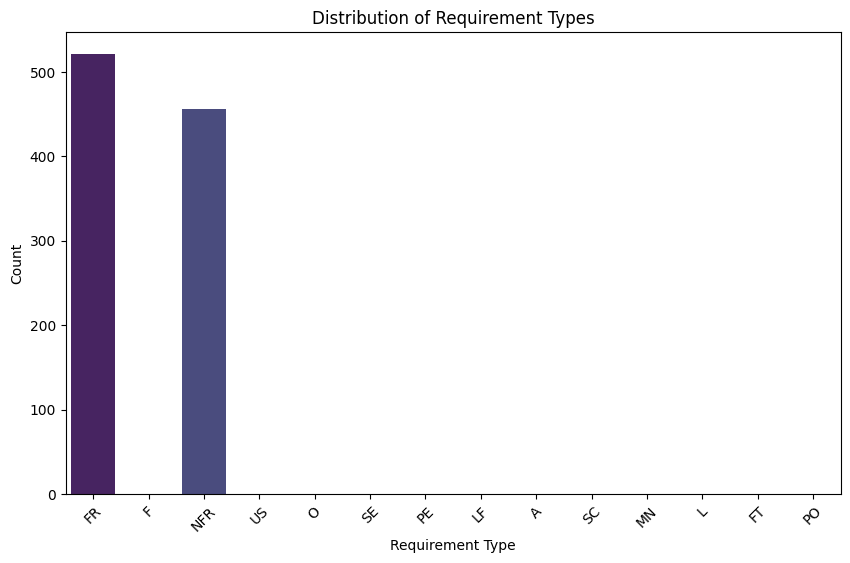

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-49-f24551e50be6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category, palette='Set2')


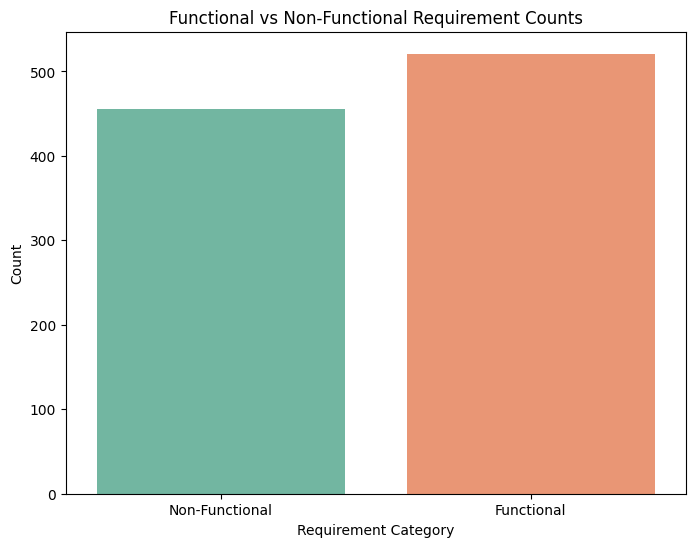

In [ ]:
# Create a copy of the dataset to work with
functional_labels = ['F', 'FR']
# Apply the transformation to the copied dataset without altering the original
category = dataset_copy['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=category, palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()


Summary statistics for requirement lengths:


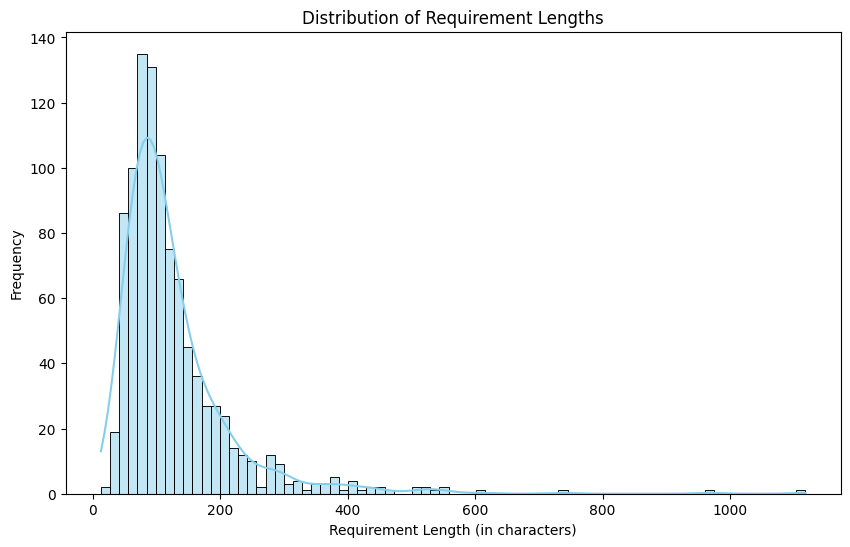

In [ ]:
dataset_copy['Requirement_Length'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
dataset_copy['Word_Count'] = dataset_copy['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset_copy['Character_Count'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset_copy['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset_copy['Character_Count'].describe())

Summary statistics for word counts:
count    977.000000
mean      21.146366
std       15.098178
min        2.000000
25%       12.000000
50%       17.000000
75%       24.000000
max      179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count     977.000000
mean      126.763562
std        92.692060
min        13.000000
25%        75.000000
50%       103.000000
75%       147.000000
max      1118.000000
Name: Character_Count, dtype: float64


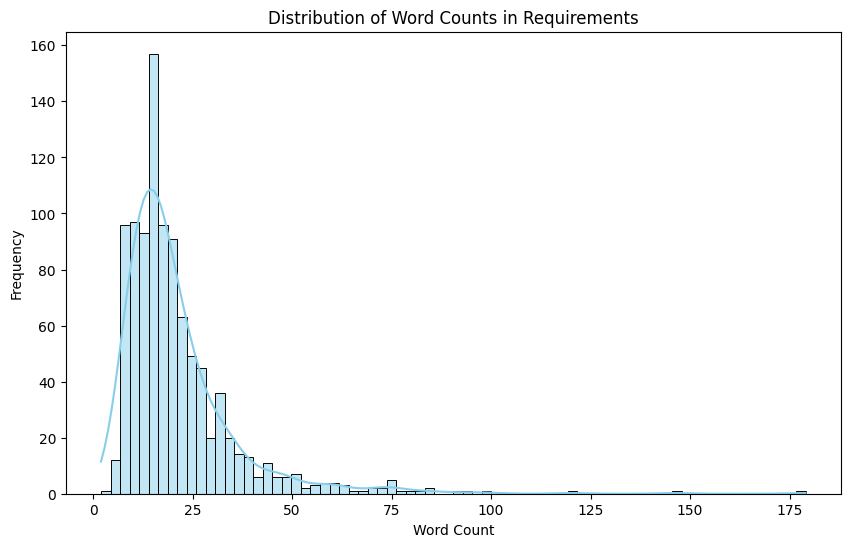

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:


# 1. Average Length of All Requirements
def average_length(dataset_copy):
    avg_length = dataset_copy['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset_copy):
    word_lengths = dataset_copy['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset_copy['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset_copy['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset_copy):
    requirement_counts = dataset_copy['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset_copy),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset_copy)
complexity = textual_complexity(dataset_copy)
uniqueness = unique_vs_repeated(dataset_copy)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


Average Length of All Requirements:
126.76356192425793

Textual Complexity:
{'avg_word_length': 4.68680406618402, 'avg_sentence_count': 1.3203684749232343, 'avg_sentence_length': 17.417780377248132}

Unique vs. Repeated Requirements:
{'total_requirements': 977, 'unique_requirements': 975, 'repeated_requirements': 1, 'repeated_requirements_list': Requirement
Only registered customers can purchase streaming movies.    2
Name: count, dtype: int64}


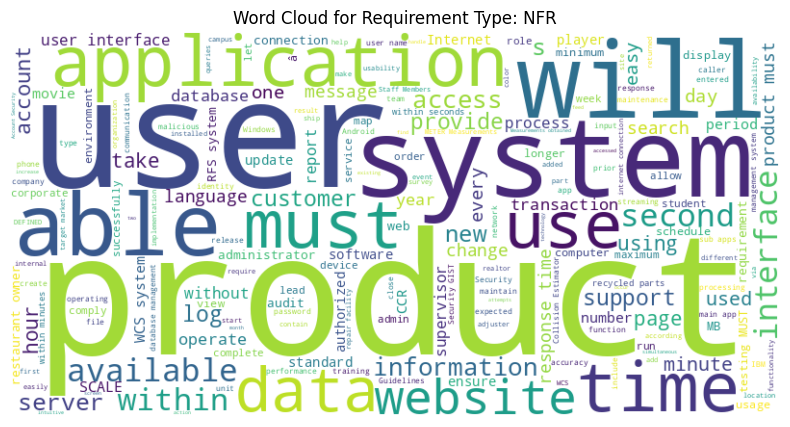

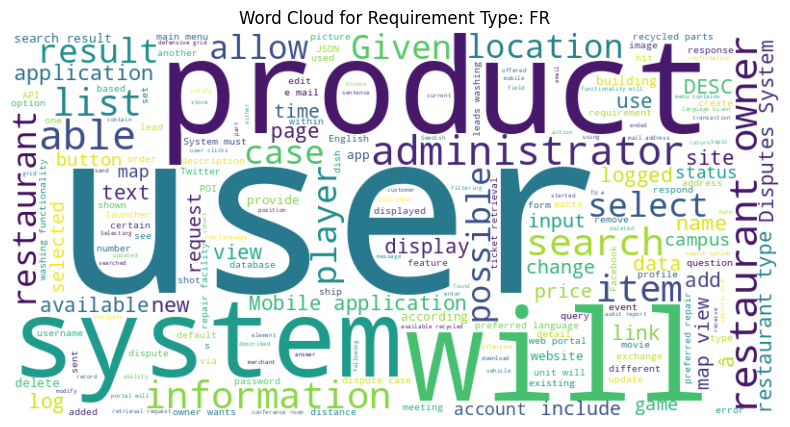

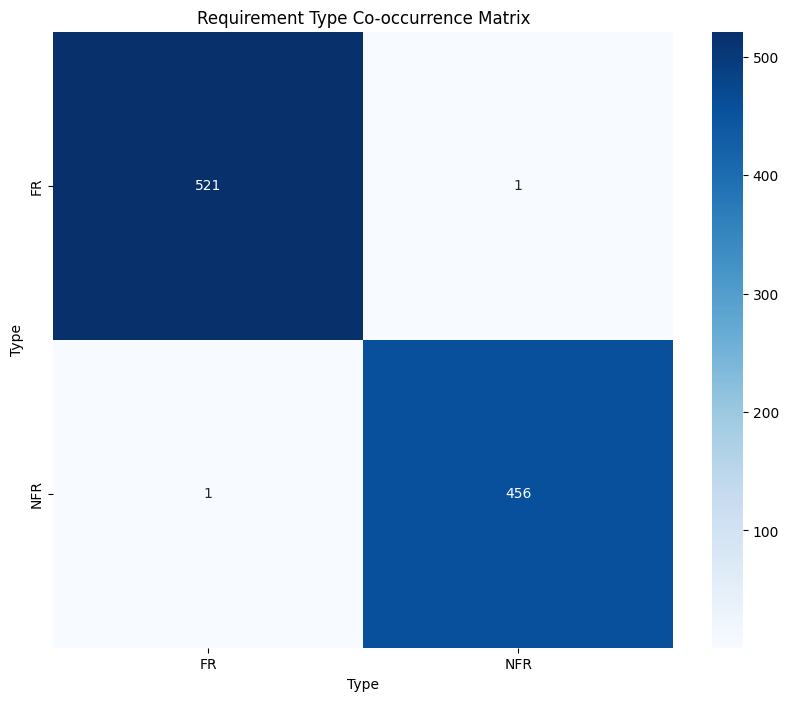

In [ ]:

def generate_word_clouds_by_type(dataset_copy):
    requirement_types = dataset_copy['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset_copy[dataset_copy['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset_copy):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset_copy = dataset_copy.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type']).T.dot(
        pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset_copy)
requirement_type_cooccurrence_matrix(dataset_copy)

## missing check

In [ ]:
# 1. Check for Missing / Incomplete Data
def check_missing_data(dataset_copy):
    missing_data = dataset_copy.isnull().sum()
    incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)]

    print("Missing Data Summary:")
    print(missing_data)
    print("\nRows with Incomplete Data:")
    print(incomplete_rows)

    return missing_data, incomplete_rows

missing_data, incomplete_rows = check_missing_data(dataset1)


Missing Data Summary:
Type           0
Requirement    0
dtype: int64

Rows with Incomplete Data:
Empty DataFrame
Columns: [Type, Requirement]
Index: []


In [ ]:
def check_duplicates(dataset_copy):
    duplicate_rows = dataset_copy[dataset_copy.duplicated()]
    print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
    print("Duplicate Rows:")
    print(duplicate_rows)

    return duplicate_rows
duplicate_rows = check_duplicates(dataset_copy)



Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Type, Requirement, Requirement_Length, Word_Count, Character_Count]
Index: []


##**test dataset**

In [ ]:
testDataSet = pd.read_csv("/content/drive/MyDrive/grad/nfr-test.csv")
testDataSet

,Column1,Column2
0,F,The system shall display Events or Activities.
1,F,The display shall have two regions left 2/3 o...
2,F,The data displayed in both the nodes within th...
3,F,The table side of the display shall be split i...
4,F,The top 1/4 of the table will hold events that...
...,...,...
65,SE,The Disputes application shall manipulate and ...
66,SE,All updates to data files or database must be ...
67,L,The Disputes application must conform to the l...
68,L,All business rules specified in the Disputes S...


In [ ]:
testDataSet.rename(columns={"Column1": "Type", "Column2": "Requirement"}, inplace=True)

##**Functions**

In [ ]:
## lower casing

def lower_casing(df):
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  return df

newDS1=lower_casing(dataset_copy)
newTestDS=lower_casing(testDataSet.copy())


In [ ]:
def extract_named_entities(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for chunk in named_entities:
        if hasattr(chunk, 'label'):
            entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities

In [ ]:
## removing non word and non whitespaces
def remover(df):
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  return df

newDS1=remover(newDS1)
newTestDS=remover(newTestDS)

In [ ]:
## removing digits
def digit_remover(df):
  df = df.replace(to_replace=r'\d', value='', regex=True)
  return df

newDS1=digit_remover(newDS1)
newTestDS=digit_remover(newTestDS)


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
## remove puncituation
def remove_punc(df,label):
  xx= []
  for i in range(len(df[label])):
    temp =df[label][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return xx

newDS1['Requirement']=remove_punc(newDS1,'Requirement')
newTestDS['Requirement']=remove_punc(newTestDS,'Requirement')



In [ ]:
## before stepping into integration and tokenization phase we just make sure all our datasets have the same features
print(newDS1['Type'].unique())
print(newTestDS['Type'].unique())
type(newDS1)

['nfr' 'fr']
['f' 'lf' 'us' 'o' 'se' 'l']


pandas.core.frame.DataFrame

In [ ]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [ ]:
## dataset 1
x=count_non_english_characters(newDS1,'Requirement')
print('Number of non english  characters : ' , x)

['â', 'â'] the twitter âtweetâ interface should be according to the twitter guidelines
['â', 'â'] the facebook âlikeâ interface should be according to the facebook guidelines
['â'] hard drive space gist hard drive space scale the applicationâs need of hard drive space meter mb must no more than mb plan no more than mb wish no more than mb mb defined megabyte
['â', 'œ', 'â', 'â'] design constraints we will use âœwaterfall methodâ and object â oriented programming paradigm we will use java as programming language the android version of the device should be or higher the system requires internet connection all the time
['â'] â the system will be designed in such a way that the algorithms for the four main units will be able to be easily swapped out
['â'] the overall accuracy of the web apiâs response will be measured using a developermade testing set
['â'] the accuracy of the generic question constructionâ part will be close to
['â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â'] 

In [ ]:
##test dataset
z=count_non_english_characters(newTestDS,'Requirement')
print('Number of non english  characters : ' , z)

Number of non english  characters :  0


In [ ]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

newDS1['Requirement']=remove_non_english_characters(newDS1,'Requirement')
newTestDS['Requirement']=remove_non_english_characters(newTestDS,'Requirement')

## testing our work
print('Number of non english characters dataset 1 : ',count_non_english_characters(newDS1,'Requirement') ,'\nNumber of non english  characters : ',
count_non_english_characters(newTestDS,'Requirement'))

Number of non english characters dataset 1 :  0 
Number of non english  characters :  0


<ipython-input-37-f72cc5889bd6>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i]='nf'
<ipython-input-37-f72cc5889bd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

ValueError: Columns must be same length as key

AttributeError: 'DataFrame' object has no attribute 'unique'


## stemming :  Convert words to their base forms to reduce redundancy.
## lemmatization :  Convert words to their base forms to reduce redundancy.
##named entity recognition :  Identify entities such as people, systems, dates, etc., which could be crucial in defining use cases.



## **Note** : that the differnece between stemming and lemmatization is that

1 ) meaning
stemming : meaning isn't important to me or the proccess
lemmatization : meaning is very important ans=d can actually determine the output

2) based
stemming : rule approch based where it focuses on finding the words with the same root no matter thier meaning
lemmatization : dictionary based approch where it traces the word back to it's root and determine it's meaning based on :-
                        1 - it's dictionary meaning and
                        2 - it's position in the sentence  
3)accuracy
lemmataization is more accurate the stemming

****Ex :  studies****


stemming output : **studi** based on it can be studies or studied
lemmatzation output : **study** based on studies means in the dictionary the action of studying with it's infinitive form is study



##**Remove Stop Words** :  remove common ones that don't contribute to understanding requirements.

In [ ]:


def remove_SW(ds,label):
  x = []
  for i in range(len(ds[label])):
    words = word_tokenize(ds[label][i])
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    # print("Filtered Sentence (without stop words):", filtered_sentence)
    x.append(filtered_sentence)
  return x


newDS1['Requirement']=remove_SW(newDS1,'Requirement')
newTestDS['Requirement']=remove_SW(newTestDS,'Requirement')




##**Tokenization** : Split the transcribed text into sentences and words.



In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Function to tokenize and pad the sequences
# def tokenize_and_pad_sequences(train_data, test_data):
#     # Get unique words from the training data
#     unique_words = set(train_data['Requirement'])
#     num_unique_words = len(unique_words)

#     # Initialize the tokenizer with OOV token
#     tokenizer = Tokenizer(num_words=num_unique_words, oov_token="<OOV>")

#     # Fit tokenizer on the training data
#     tokenizer.fit_on_texts(train_data['Requirement'])

#     # Convert the training data to sequences
#     train_sequences = tokenizer.texts_to_sequences(train_data['Requirement'])

#     # Calculate the length of the longest sequence in the training data
#     maxlen = max(len(seq) for seq in train_sequences)

#     # Pad the training sequences to the length of the longest sequence
#     padded_train_sequences = pad_sequences(train_sequences, maxlen=maxlen)

#     # Convert the test data to sequences
#     test_sequences = tokenizer.texts_to_sequences(test_data['Requirement'])

#     # Pad the test sequences to the same length as the training sequences
#     padded_test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

#     return padded_train_sequences, padded_test_sequences, tokenizer

# # Apply the function to your datasets
# padded_train, padded_test, tokenizer = tokenize_and_pad_sequences(newDS1, newTestDS)

# # Print the padded sequences if needed
# print("\nPadded Train Sequences:")
# print(padded_train)

# print("\nPadded Test Sequences:")
# print(padded_test)


In [ ]:
# Get unique words
unique_words = set(newDS1['Requirement'])
num_unique_words = len(unique_words)


# ## OOV means the words that couldn't get tokenized
tokenizer = Tokenizer(num_words = num_unique_words, oov_token="<OOV>")
tokenizer.fit_on_texts(newDS1['Requirement'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(newDS1['Requirement'])

# If you want to visualize the tokenized words:
tokenized_texts = []
for sequence in sequences:
    tokenized_text = [tokenizer.index_word[word_index] for word_index in sequence if word_index != 0]  # Exclude padding token (0)
    tokenized_texts.append(tokenized_text)


# print("\nWord Index = " , word_index)
# print("\nSequences = " , sequences)


# longest_line = max(newDS1['Requirement'], key=len)



# padded_sequences = pad_sequences(sequences, maxlen=99)
# print("\nPadded_sequences Sequences:")
# print(padded_sequences)




# # Try with words that the tokenizer wasn't fit to
# test_data = [
#     'the system shall be responisve',
#     'the program needs to be done within days'
# ]

# test_seq = tokenizer.texts_to_sequences(test_data)
# print("\nTest Sequence = ", test_seq)

# padded = pad_sequences(test_seq, maxlen=99 )
# print("\nPadded Test Sequence: ")
# print(padded)

# # Note : 1 in the test sequnce stands for OOV which means this word in test case wasn't recognized , found or tokenized in the train Dataset






In [ ]:
tokenized_texts

newDS1['Requirement'] = tokenized_texts

In [ ]:
word_index

{'<OOV>': 1,
 'shall': 2,
 'user': 3,
 'product': 4,
 'system': 5,
 'able': 6,
 'restaurant': 7,
 'users': 8,
 'search': 9,
 'application': 10,
 'must': 11,
 'information': 12,
 'time': 13,
 'administrator': 14,
 'owner': 15,
 'use': 16,
 'data': 17,
 'available': 18,
 'within': 19,
 'list': 20,
 'website': 21,
 'given': 22,
 'new': 23,
 'view': 24,
 'case': 25,
 'allow': 26,
 'results': 27,
 'language': 28,
 'player': 29,
 'interface': 30,
 'possible': 31,
 'map': 32,
 'seconds': 33,
 'provide': 34,
 'access': 35,
 'account': 36,
 'page': 37,
 'mobile': 38,
 'select': 39,
 'disputes': 40,
 'database': 41,
 'number': 42,
 'one': 43,
 'display': 44,
 'parts': 45,
 'preferred': 46,
 'type': 47,
 'used': 48,
 'link': 49,
 'name': 50,
 'items': 51,
 'desc': 52,
 'response': 53,
 'set': 54,
 'using': 55,
 'server': 56,
 'logged': 57,
 'login': 58,
 'request': 59,
 'address': 60,
 'minutes': 61,
 'menu': 62,
 'password': 63,
 'email': 64,
 'item': 65,
 'input': 66,
 'building': 67,
 'wants':

In [ ]:
# newDS1['Requirement'] = padded_sequences.tolist()
# len(newDS1['Requirement'][0])

99

In [ ]:
# newDS1['Requirement']


,Requirement
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
972,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
973,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
974,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
975,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## **Speech Tagging** : Tagging: Understand the role each word plays in the sentence to help identify action verbs (e.g., "must", "should", "requires") related to requirements.

In [ ]:

# # Assume the text is already tokenized
# tokenized_sentence = ['The', 'system', 'should', 'process', 'orders', 'quickly', 'and', 'efficiently', '.']

# # Perform POS tagging on the tokenized sentence
# pos_tags = nltk.pos_tag(word_index)

# # Display the result
# print("POS Tags:", pos_tags)


word_tokenize(text): Tokenizes the text into individual words.

nltk.pos_tag(tokens): Tags each word with its respective Part-of-Speech (POS), such as:

NN = Noun

VB = Verb

RB = Adverb

DT = Determiner, etc.

POS Tags Key (Examples):

NN: Noun (singular)

NNS: Noun (plural)

VB: Verb (base form)

VBD: Verb (past tense)

RB: Adverb

JJ: Adjective

## **lemmatization** : refers to understanding the context of the word it's more of a dictnory based method



Ex : studies => study



In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatization(df, label):
    x = []
    for tokenized_sentence in df[label]:
        # Ensure input is a list of tokens
        # if not isinstance(tokenized_sentence, list):
        #     raise ValueError(f"Expected a list of tokens, got {type(tokenized_sentence)}: {tokenized_sentence}")

        # Convert all tokens to strings
        tokenized_sentence = [str(word) for word in tokenized_sentence]

        # Get part-of-speech tags for the tokenized sentence
        pos_tags = nltk.pos_tag(tokenized_sentence)

        # Map POS tags to WordNet format and lemmatize
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        lemmatized_words = [
            lemmatizer.lemmatize(word.lower(), tag_dict.get(tag[0].upper(), wordnet.NOUN))
            for word, tag in pos_tags
        ]

        # Join the lemmatized words back into a sentence
        lemmatized_sentence = ' '.join(lemmatized_words)
        x.append(lemmatized_sentence)
    return x

# Apply the lemmatization function
newDS1['Requirement'] = lemmatization(newDS1, 'Requirement')








In [ ]:
sequences = tokenizer.texts_to_sequences(newDS1['Requirement'])
padded_sequences = pad_sequences(sequences, maxlen=99)

In [ ]:
# 5. Splitting Data

from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# Encode labels as integers
label_encoder = LabelEncoder()
newDS1['Type'] = label_encoder.fit_transform(newDS1['Type'])



from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, newDS1['Type'], test_size=0.2, random_state=42
)

# 6. Model Training (Example with LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense , Bidirectional , GRU ,Conv1D, GlobalMaxPooling1D

vocab_size = len(word_index) + 1  # +1 for padding token




In [ ]:
## LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=50),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(set(newDS1['Type'])), activation='softmax')  # Assuming multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6049 - loss: 0.6846 - val_accuracy: 0.6888 - val_loss: 0.6249
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7511 - loss: 0.5588 - val_accuracy: 0.8469 - val_loss: 0.4228
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8474 - loss: 0.3402 - val_accuracy: 0.8163 - val_loss: 0.3848
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9254 - loss: 0.2002 - val_accuracy: 0.8673 - val_loss: 0.3979
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9607 - loss: 0.1113 - val_accuracy: 0.8367 - val_loss: 0.5369
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9622 - loss: 0.1073 - val_accuracy: 0.8367 - val_loss: 0.4204
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9725 - loss: 0.0936 - val_accuracy: 0.8469 - val_loss: 0.6212
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9773 - loss: 0.0578 - val_accuracy: 0.8367 - val_l

In [ ]:
## Bidirectional LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=50),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(32, activation='relu'),
    Dense(len(set(newDS1['Type'])), activation='softmax')  # Assuming multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4956 - loss: 0.6883 - val_accuracy: 0.6020 - val_loss: 0.6294
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7290 - loss: 0.5566 - val_accuracy: 0.8367 - val_loss: 0.3839
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8754 - loss: 0.3097 - val_accuracy: 0.8265 - val_loss: 0.3950
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9232 - loss: 0.1777 - val_accuracy: 0.8163 - val_loss: 0.4456
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9430 - loss: 0.1387 - val_accuracy: 0.8520 - val_loss: 0.4721
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9791 - loss: 0.0604 - val_accuracy: 0.8418 - val_loss: 0.5740
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9757 - loss: 0.0776 - val_accuracy: 0.8469 - val_loss: 0.6935
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9754 - loss: 0.0498 - val_accuracy: 0.8520 - v

In [ ]:
## GRU
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=50),
    GRU(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(set(newDS1['Type'])), activation='softmax')  # Assuming multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5843 - loss: 0.6856 - val_accuracy: 0.7398 - val_loss: 0.6213
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7673 - loss: 0.5562 - val_accuracy: 0.8112 - val_loss: 0.4237
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8868 - loss: 0.3001 - val_accuracy: 0.7959 - val_loss: 0.4557
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8881 - loss: 0.2683 - val_accuracy: 0.8673 - val_loss: 0.3380
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9199 - loss: 0.2002 - val_accuracy: 0.8724 - val_loss: 0.3584
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9407 - loss: 0.1549 - val_accuracy: 0.8724 - val_loss: 0.3872
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9657 - loss: 0.0869 - val_accuracy: 0.8724 - val_loss: 0.4386
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0728 - val_accuracy: 0.8776 - val

In [ ]:
## CNN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=50),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(len(set(newDS1['Type'])), activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## CNN with LSTM
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=50),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(set(newDS1['Type'])), activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification

# Sample data (make sure your dataset contains both features and labels)

df = pd.DataFrame(newDS1.copy())

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])  # Encoding labels as integers

# Split data into train and test
train_texts, eval_texts, train_labels, eval_labels = train_test_split(df['Requirement'], df['Type'], test_size=0.2, random_state=42)

# Convert train and test DataFrames into Hugging Face Dataset format
train_dataset = pd.DataFrame({'Requirement': train_texts, 'labels': train_labels})
eval_dataset = pd.DataFrame({'Requirement': eval_texts, 'labels': eval_labels})

# Convert DataFrame to Dataset using `Dataset.from_pandas`
train_dataset = Dataset.from_pandas(train_dataset)
eval_dataset = Dataset.from_pandas(eval_dataset)

# Load a tokenizer and model for sequence classification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

# Tokenize the dataset (ensure tokenization is applied to the 'Requirement' column)
def tokenize_function(examples):
    return tokenizer(examples['Requirement'], padding=True, truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Define TrainingArguments for Trainer
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    save_steps=10_000,
    logging_steps=200,
    report_to="none",
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/781 [00:00<?, ? examples/s]

Map:   0%|          | 0/196 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 